


Student midterm marks were set to the x -coordinate and final marks were the y cooridnate as we are trying to predict final marks based on midterm marks.

Implementation steps done with standardized features below. It is also worth mentioning that after updating the learning rate (alpha) to from 0.0001 to 0.1 the prediction was much more accurate and had a better fit than the non-standardized data shown later. Before updating the learning rate the previous regression line looked much similar to the initial regression line (y=-0.5x + 0) even after 2000 iterations as the steps taken were too small and did not get to achieve the optimal result. However with the old learning rate more iterations could have also solved this issue but is costly.


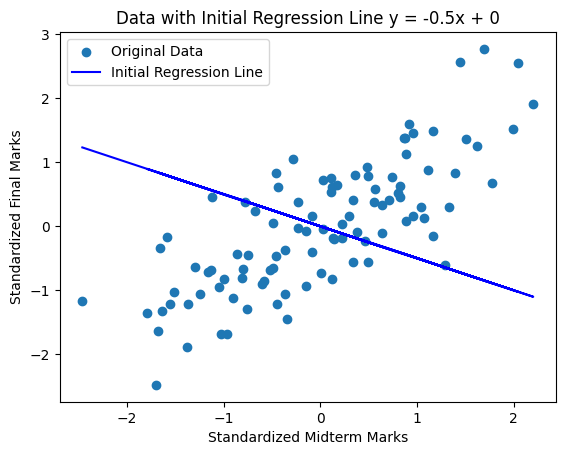


Slope (m): 0.7734781433087615
Y-intercept (b): 2.5124347047267306e-16


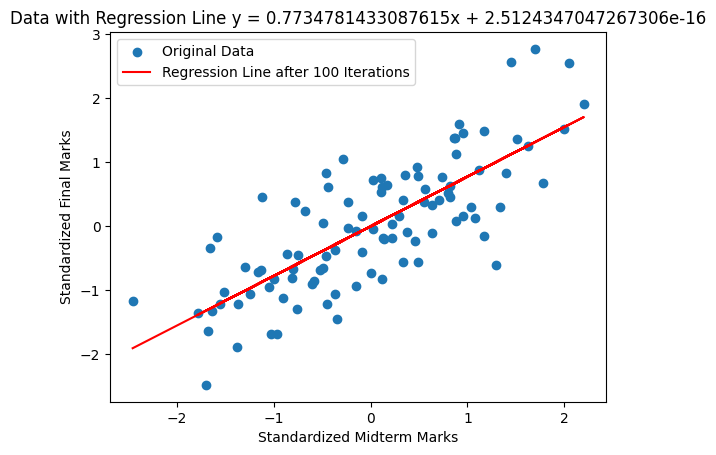

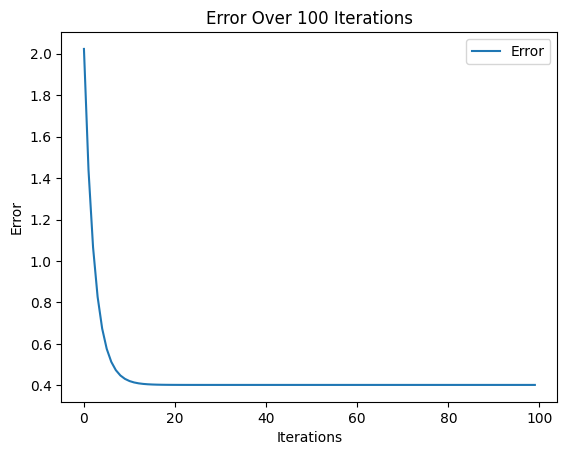

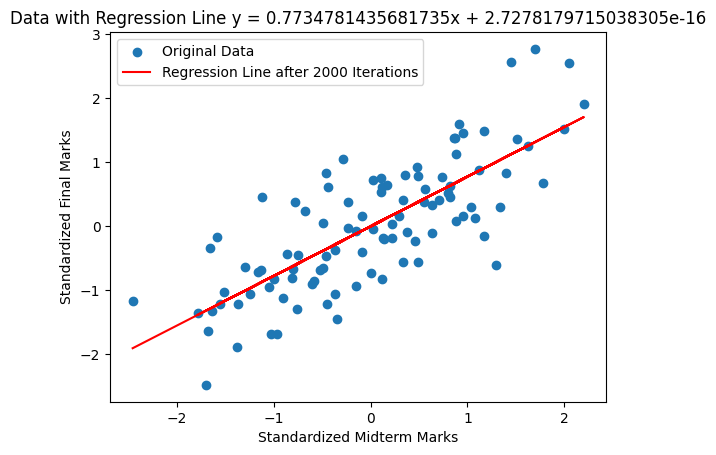

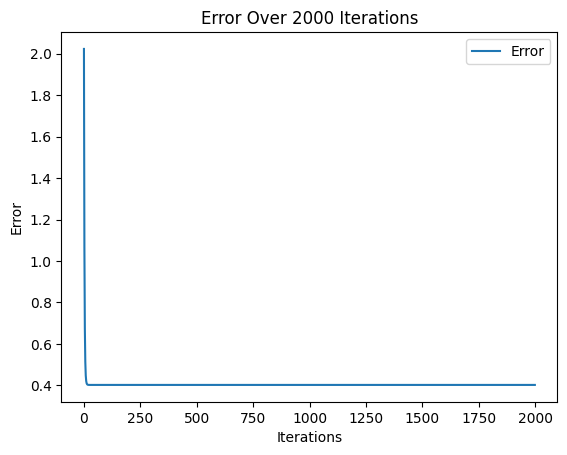

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


url = 'https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/student_marks.csv'
df = pd.read_csv(url)

# Set x to midterm marks and y to final marks as we are trying to predict students' final mark
x = df['Midterm mark'].values
y = df['Final mark'].values

# Standardization Function
def standardization(data):
    mean = np.mean(data)
    std = np.std(data)
    standardized_data = (data - mean) / std
    return standardized_data

# Error (Cost function)
def error(x, y, m, b):
    error = np.mean((y - (m*x+b))**2)
    return error

# Gradient Partial Derivatives Function
def gradients(x, y, m, b):
    dm = 2*np.mean(-x * (y - (m*x + b)))
    db = 2*np.mean(- (y - (m*x + b)))
    return dm, db

# Updating m and b using learning rate alpha Function
def updateCoefficients(m, b, dm, db, alpha):
    m = m - alpha * dm
    b = b - alpha * db
    return m, b

# Function to perform linear regression using gradient descent
def LinearRegression(x, y, m, b, alpha, epochs):
    error_values = []
    for epoch in range(epochs):
        # Calculate error
        error_values.append(error(x, y, m, b))

        # Get gradient partial derivatives
        dm, db = gradients(x, y, m, b)

        # Update m and b using learning rate
        m, b = updateCoefficients(m, b, dm, db, alpha)

    return m, b, error_values


# Standardize midterm mark and final mark features
standardized_data_x = standardization(x)
standardized_data_y = standardization(y)

# Inialize m = -0.5, b = 0, and alpha = 0.0001
m = -0.5
b = 0
alpha = 0.1

# Plot the data and the initial regression line
plt.scatter(standardized_data_x, standardized_data_y, label='Original Data')
plt.plot(standardized_data_x, m * standardized_data_x + b, color='blue', label='Initial Regression Line')
plt.xlabel('Standardized Midterm Marks')
plt.ylabel('Standardized Final Marks')
plt.legend()
plt.title('Data with Initial Regression Line y = -0.5x + 0')
plt.show()

# Update m and b 100 times
iterations = 100
slope, intercept, y_axis_error = LinearRegression(standardized_data_x, standardized_data_y, m, b, alpha, iterations)

# Print the final slope (m) and y-intercept (b)
print(f"\nSlope (m): {slope}")
print(f"Y-intercept (b): {intercept}")

# Plot the data and the regression line after 100 iterations
plt.scatter(standardized_data_x, standardized_data_y, label='Original Data')
plt.plot(standardized_data_x, slope * standardized_data_x + intercept, color='red', label='Regression Line after 100 Iterations')
plt.xlabel('Standardized Midterm Marks')
plt.ylabel('Standardized Final Marks')
plt.legend()
plt.title(f'Data with Regression Line y = {slope}x + {intercept}')
plt.show()

# New graph showing error at each iteration
plt.plot(range(iterations), y_axis_error, label='Error')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.legend()
plt.title(f'Error Over 100 Iterations')
plt.show()

# Update b and m for 2000 iterations
iterations = 2000
slope, intercept, y_axis_error = LinearRegression(standardized_data_x, standardized_data_y, m, b, alpha, iterations)
plt.scatter(standardized_data_x, standardized_data_y, label='Original Data')
plt.plot(standardized_data_x, slope * standardized_data_x + intercept, color='red', label='Regression Line after 2000 Iterations')
plt.xlabel('Standardized Midterm Marks')
plt.ylabel('Standardized Final Marks')
plt.legend()
plt.title(f'Data with Regression Line y = {slope}x + {intercept}')
plt.show()

# New graph showing error at each iteration for 2000 iterations
plt.plot(range(iterations), y_axis_error, label='Error')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.legend()
plt.title(f'Error Over 2000 Iterations')
plt.show()


Implementation Steps without Standardization shown below showing a worse regression line fit:

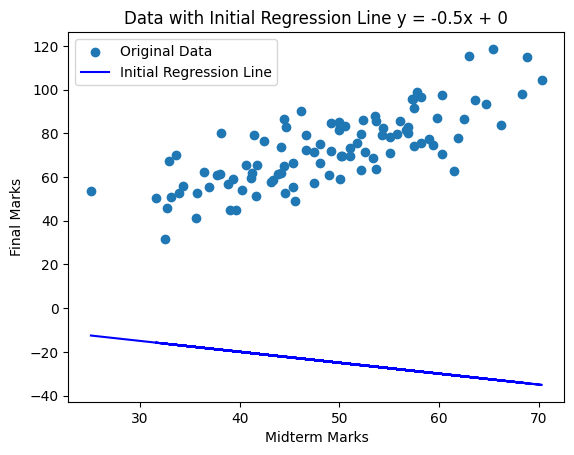


Slope (m): 1.4785727560143909
Y-intercept (b): 0.04490536397288713


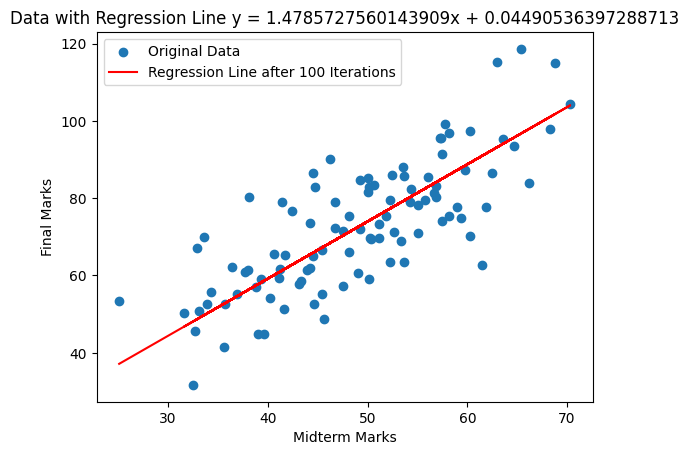

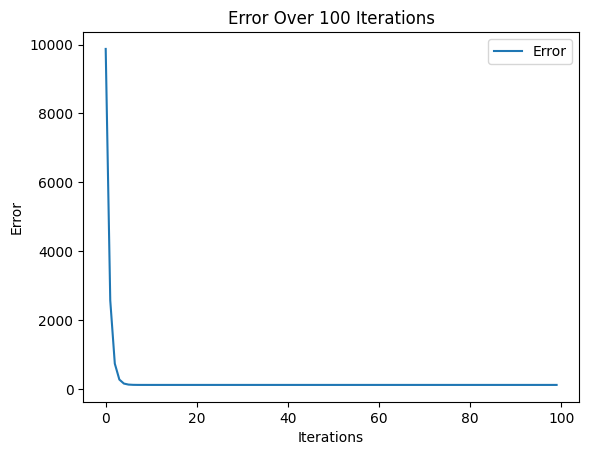

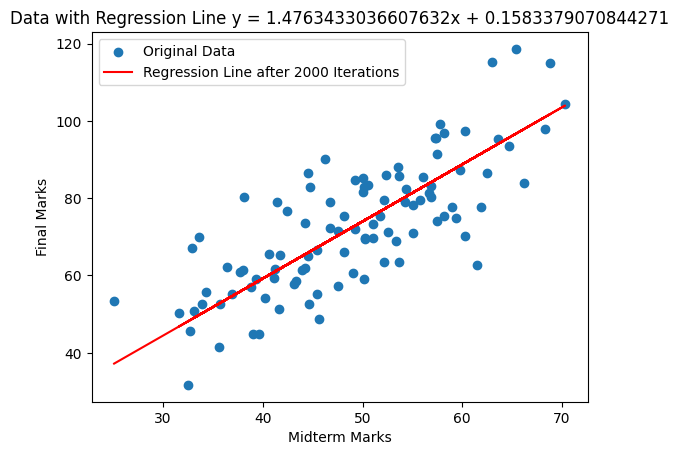

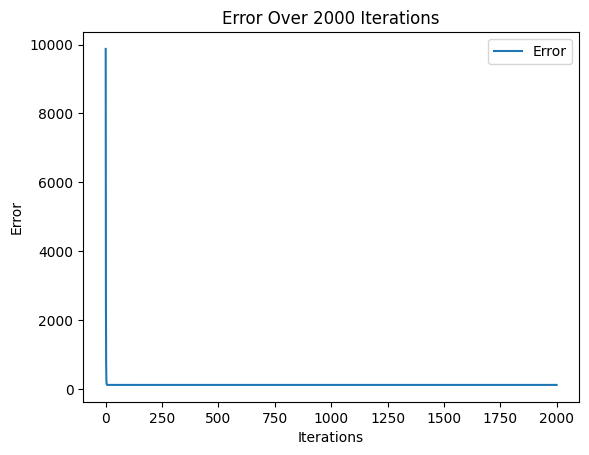

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


url = 'https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/student_marks.csv'
df = pd.read_csv(url)

# Set x to midterm marks and y to final marks as we are trying to predict students' final mark
x = df['Midterm mark'].values
y = df['Final mark'].values

# Error (Cost function)
def error(x, y, m, b):
    error = np.mean((y - (m*x+b))**2)
    return error

# Gradient Partial Derivatives Function
def gradients(x, y, m, b):
    dm = 2*np.mean(-x * (y - (m*x + b)))
    db = 2*np.mean(- (y - (m*x + b)))
    return dm, db

# Updating m and b using learning rate alpha Function
def updateCoefficients(m, b, dm, db, alpha):
    m = m - alpha * dm
    b = b - alpha * db
    return m, b

# Function to perform linear regression using gradient descent
def LinearRegression(x, y, m, b, alpha, epochs):
    error_values = []
    for epoch in range(epochs):
        # Calculate error
        error_values.append(error(x, y, m, b))

        # Get gradient partial derivatives
        dm, db = gradients(x, y, m, b)

        # Update m and b using learning rate
        m, b = updateCoefficients(m, b, dm, db, alpha)

    return m, b, error_values

# Repeated steps without Standardization
# Inialize m = -0.5, b = 0, and alpha = 0.0001
m = -0.5
b = 0
alpha = 0.0001

# Plot the data and the initial regression line
plt.scatter(x, y, label='Original Data')
plt.plot(x, m*x + b, color='blue', label='Initial Regression Line')
plt.xlabel('Midterm Marks')
plt.ylabel('Final Marks')
plt.legend()
plt.title('Data with Initial Regression Line y = -0.5x + 0')
plt.show()

# Update m and b 100 times
iterations = 100
slope, intercept, y_axis_error = LinearRegression(x, y, m, b, alpha, iterations)
print(f"\nSlope (m): {slope}")
print(f"Y-intercept (b): {intercept}")

# Plot the data and the regression line after 100 iterations
plt.scatter(x, y, label='Original Data')
plt.plot(x, slope * x + intercept, color='red', label='Regression Line after 100 Iterations')
plt.xlabel('Midterm Marks')
plt.ylabel('Final Marks')
plt.legend()
plt.title(f'Data with Regression Line y = {slope}x + {intercept}')
plt.show()

# New graph showing error at each iteration
plt.plot(range(iterations), y_axis_error, label='Error')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.legend()
plt.title(f'Error Over 100 Iterations')
plt.show()

# Update b and m for 2000 iterations
iterations = 2000
slope, intercept, y_axis_error = LinearRegression(x, y, m, b, alpha, iterations)
plt.scatter(x, y, label='Original Data')
plt.plot(x, slope * x + intercept, color='red', label='Regression Line after 2000 Iterations')
plt.xlabel('Midterm Marks')
plt.ylabel('Final Marks')
plt.legend()
plt.title(f'Data with Regression Line y = {slope}x + {intercept}')
plt.show()

# New graph showing error at each iteration for 2000 iterations
plt.plot(range(iterations), y_axis_error, label='Error')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.legend()
plt.title(f'Error Over 2000 Iterations')
plt.show()



Verifying results using Python API (sklearn) without Standardization

In [ ]:
import matplotlib
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression

#data = pd.read_csv("univariate_linear_regression.csv") #if you upload here
data = pd.read_csv('https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/student_marks.csv')
data


,Midterm mark,Final mark
0,32.5,31.7
1,53.4,68.8
2,61.5,62.6
3,47.5,71.5
4,59.8,87.2
...,...,...
95,50.0,81.5
96,49.2,72.1
97,50.0,85.2
98,48.1,66.2


The score of the model is: 0.5982684385776686.
The coef of the model is: [[1.32199232]].
The intercept of the model is: [8.01157814].


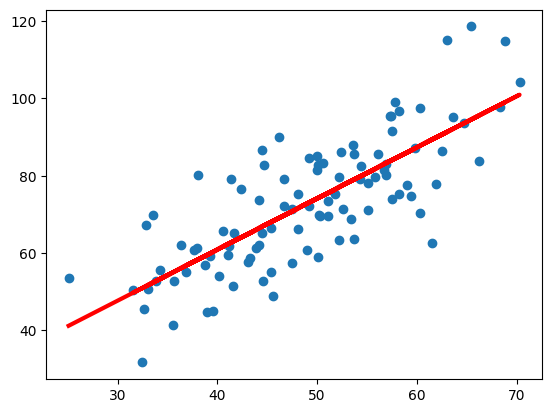

In [ ]:
X = data['Midterm mark']
y = data['Final mark']

X = X.values.reshape(-1,1)
y = y.values.reshape(-1,1)

lin_reg = LinearRegression()

lin_reg_model = lin_reg.fit(X,y)

model_score = lin_reg_model.score(X, y)


log_message = f'The score of the model is: {model_score}.'
print(log_message)

log_message = f'The coef of the model is: {lin_reg_model.coef_}.'
print(log_message)

log_message = f'The intercept of the model is: {lin_reg_model.intercept_}.'
print(log_message)

#The model is y = 1.32199232 + 8.01157814 * x

model_predict = lin_reg_model.predict(X)

plt.scatter(X,y)
plt.plot(X, model_predict, color='red', linewidth=3)
plt.show()

Now using Standardization to verify results

The score of the model is: 0.5982684385776686.
The coef of the model is: [[0.77347814]].
The intercept of the model is: [2.55154319e-16].


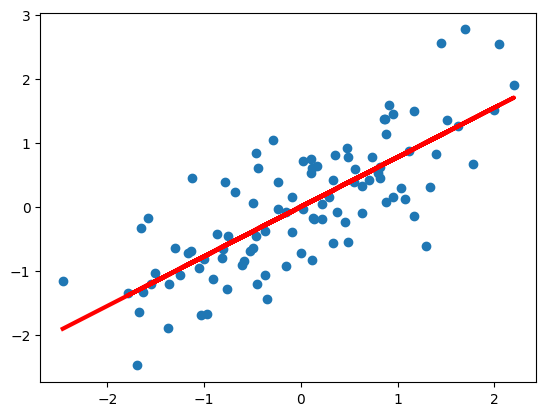

In [ ]:
standardized_data_x = standardization(X)
standardized_data_y = standardization(y)

lin_reg = LinearRegression()

lin_reg_model = lin_reg.fit(standardized_data_x,standardized_data_y)

model_score = lin_reg_model.score(standardized_data_x, standardized_data_y)


log_message = f'The score of the model is: {model_score}.'
print(log_message)

log_message = f'The coef of the model is: {lin_reg_model.coef_}.'
print(log_message)

log_message = f'The intercept of the model is: {lin_reg_model.intercept_}.'
print(log_message)

#The model is y = 0.77347814 + 8.2.55154319e-16 * x

model_predict = lin_reg_model.predict(standardized_data_x)

plt.scatter(standardized_data_x,standardized_data_y)
plt.plot(standardized_data_x, model_predict, color='red', linewidth=3)
plt.show()

When comparing the standardized results using Python API, it can be seen that the coefficient (0.7734...) and intercept are almost identical after 2000 iterations verifying the results. However, when comparing the results of the two methods using the non-standardized data, the coefficient and intercept are noticably different which is why standardization is important for achieving the best fit.